## Logistic Regression - Iris

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
px.scatter_3d(df, x = 'sepal length (cm)', y ='sepal width (cm)' , z ='petal width (cm)', color = 'Species')

## Train Test Split

In [9]:
x = df.drop('Species', axis = 1)
y = df['Species']

In [10]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12, stratify=y)

In [15]:
y_test.value_counts()

2    10
0    10
1    10
Name: Species, dtype: int64

In [16]:
y_train.value_counts()

2    40
0    40
1    40
Name: Species, dtype: int64

## Model Building 

In [17]:
log_clf = LogisticRegression(multi_class='ovr')
log_clf.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

## Evaluation

In [21]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act, pred)
    print('Accuracy Score :', acc_score)
    print('***'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)
    print('***'*20)
    
    multilabel_cnf_matrix = multilabel_confusion_matrix(act, pred)
    print('Multilabel Confusion Matrix : \n', multilabel_cnf_matrix)
    print('***'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report : \n', clf_report)
    print('***'*20)
    
    return pred

print('Testing Data Evaluation'.center(60, '*'))
y_pred = evaluate_model(log_clf, x_test, y_test)

******************Testing Data Evaluation*******************
Accuracy Score : 0.9666666666666667
************************************************************
Confusion Matrix : 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
************************************************************
Multilabel Confusion Matrix : 
 [[[20  0]
  [ 0 10]]

 [[20  0]
  [ 1  9]]

 [[19  1]
  [ 0 10]]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

************************************************************


In [22]:
print('TRaining Data Evaluation'.center(60, '*'))
y_pred_train = evaluate_model(log_clf, x_train, y_train)

******************TRaining Data Evaluation******************
Accuracy Score : 0.9416666666666667
************************************************************
Confusion Matrix : 
 [[40  0  0]
 [ 0 35  5]
 [ 0  2 38]]
************************************************************
Multilabel Confusion Matrix : 
 [[[80  0]
  [ 0 40]]

 [[78  2]
  [ 5 35]]

 [[75  5]
  [ 2 38]]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.88      0.91        40
           2       0.88      0.95      0.92        40

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

************************************************************


## ROC Curve For Multiclass Classification

In [23]:
y_pred_prob = log_clf.predict_proba(x_test)
y_pred_prob

array([[8.61821466e-04, 3.73789147e-01, 6.25349032e-01],
       [7.92634149e-01, 2.07360945e-01, 4.90568382e-06],
       [7.85080346e-01, 2.14918158e-01, 1.49578666e-06],
       [2.21015878e-02, 8.14167950e-01, 1.63730462e-01],
       [8.59479198e-05, 2.74197525e-01, 7.25716527e-01],
       [1.00589246e-02, 6.52779032e-01, 3.37162043e-01],
       [1.54417693e-01, 8.37859003e-01, 7.72330356e-03],
       [7.32514672e-05, 1.02424026e-01, 8.97502722e-01],
       [8.98734663e-03, 4.31401178e-01, 5.59611476e-01],
       [8.74195406e-06, 3.76113196e-01, 6.23878062e-01],
       [3.55843370e-02, 8.97976150e-01, 6.64395134e-02],
       [8.33432299e-01, 1.66564959e-01, 2.74272911e-06],
       [9.44485495e-01, 5.55061875e-02, 8.31704731e-06],
       [8.83418014e-01, 1.16578275e-01, 3.71060802e-06],
       [6.85655780e-04, 2.73613516e-01, 7.25700828e-01],
       [3.37538934e-02, 7.26133742e-01, 2.40112364e-01],
       [5.74418729e-03, 6.50610514e-01, 3.43645299e-01],
       [1.34604206e-05, 3.17200

In [24]:
y_test

142    2
3      0
13     0
97     1
102    2
91     1
93     1
109    2
56     1
122    2
92     1
2      0
5      0
27     0
147    2
61     1
54     1
105    2
127    2
87     1
82     1
6      0
11     0
128    2
45     0
94     1
104    2
22     0
12     0
135    2
Name: Species, dtype: int32

In [25]:
from sklearn.preprocessing import label_binarize

In [26]:
label_binarize(y_test, classes=[0,1,2])

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

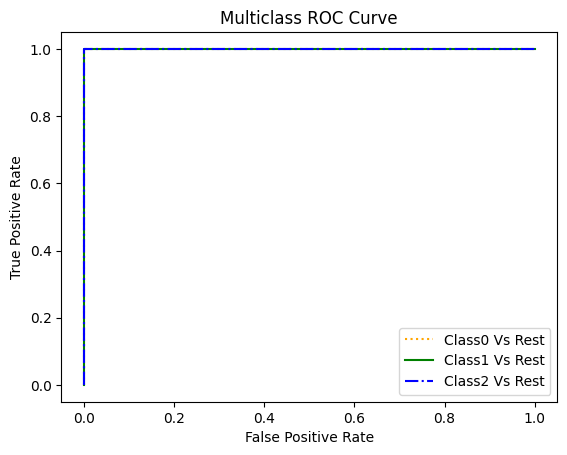

In [45]:
fpr = {}
tpr= {}
thresh = {}

n_class = 3

for i in range(n_class):
    fpr[i] , tpr[i] , thresh[i] = roc_curve(y_test, y_pred_prob[:,i],pos_label=i)

# PLotting

plt.plot(fpr[0], tpr[0], label = 'Class0 Vs Rest', color = 'orange', linestyle = ':')
plt.plot(fpr[1], tpr[1], label = 'Class1 Vs Rest', color = 'green', linestyle = '-')
plt.plot(fpr[2], tpr[2], label = 'Class2 Vs Rest', color = 'blue', linestyle = '-.')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()